# Εφαρμοσμένα Μαθηματικά ΙΙ
## Εργαστηριακή Άσκηση 7: Όρια και Παράγωγοι 
## Ελευθέριος Μαμάτας ([emamatas@uom.edu.gr](mailto:emamatas@uom.edu.gr))

Το σημειωματάριο της έβδομης εργαστηριακής άσκησης χρησιμοποιεί την python για την επίλυση προβλημάτων που σχετίζονται με τα όρια και τις παραγώγους.

Το σημειωματάριο δεν ακολουθεί τον παραδοσιακό τρόπο που γράφουμε κώδικα, δηλαδή σε αρχεία κειμένου. Αποθηκεύεται με βάση τη μορφοποίηση [JSON](http://en.wikipedia.org/wiki/JSON). Με αυτό τον τρόπο μπορούμε να έχουμε σε ένα ενιαίο αρχείο μορφοποιημένο κείμενο, κώδικα και τα αποτελέσματα του κώδικα. Τα σημειωματάρια εκτελούνται σε διακομιστές που τρέχουν εφαρμογές, όπως το [jupyter](http://jupyter.org/) ή το [IPython notebook](http://ipython.org/notebook.html). Πέρα από αυτή τη διαφορά, ο κώδικας της Python είναι ο ίδιος.

**Υπενθυμίζουμε οτι ο κώδικας εκτελείται με την επιλογή του κελιού και το συνδυασμό πλήκτρων Shift + Enter. Σε περίπτωση που δεν εκτελεστεί, πατήστε το πλήκτρο F5 (Refresh) και ξαναπροσπαθήστε.**

Προετοιμάζουμε το περιβάλλον της python για γραφικές παραστάσεις, τη χρήση των βιβλιοθηκών `numpy` και `sympy`, αλλά και για την εμφάνιση των μαθηματικών συμβόλων χρησιμοποιώντας το $\LaTeX$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
from sympy import *
import numpy


In [3]:
init_printing(use_latex=true)


Ορίζουμε τα σύμβολα που θα χρησιμοποιήσουμε στις παρακάτω ασκήσεις. Μπορούμε να χρησιμοποιήσουμε την κλάση `symbols` για να ορίσουμε πολλά σύμβολα ταυτόχρονα.

In [4]:
x,y,h,a,b,f = symbols ('x y h a b f')


## Όρια
Τα όρια μπορούν να υπολογιστούν χρησιμοποιώντας τη συνάρτηση `limit`. Για παράδειγμα, μπορούμε να υπολογίσουμε το παρακάτω όριο:

$\lim_{x\to0} \frac{sin(x)}{x}$

Χρησιμοποιώντας τη συνάρτηση `limit`:

In [5]:
limit(sin(x)/x, x, 0)

Εάν θέλουμε να υπολογίσουμε το όριο:

$\lim_{x\to0} \frac{1}{x}$


In [6]:
limit(1/x,x,0)


Μπορούμε να υπολογίσουμε τα παρακάτω πλευρικά όρια:

$\lim_{x\to0^+} \frac{1}{x}$

και

$\lim_{x\to0^-} \frac{1}{x}$

In [7]:
limit(1/x,x,0,'+')


In [8]:
 limit(1/x,x,0,'-')

Ο χαρακτήρας $\infty$ συμβολίζεται με τη βοήθεια των χαρακτήρων οο. Δηλαδή το παρακάτω όριο:

$\lim_{x\to\infty} \frac{1}{x^2+1}$

Υπολογίζεται:

In [9]:
limit(1/(x**2+1),x,oo)

**Εφαρμογή 1:** Υπολογίστε τα παρακάτω όρια χρησιμοποιώντας τη συνάρτηση `limit`. Μπορείτε να επαληθεύσετε τα αποτελέσματα στο χαρτί.

* $\lim_{x\to1} \frac{x^4-1}{2x^2-x-1}$ - Το όριο επιλύεται θεωρητικά με τη χρήση των ταυτοτήτων $a^2-b^2=(a-b)(a+b)$ και $ax^2+bx+c=a(x-x_1)(x-x_2)$ (όπου $x_1$ και $x_2$ οι ρίζες της εξίσωσης $ax^2+bx+c=0$). 
* $\lim_{h\to0} \frac{(x+h)^3-x^3}{h}$ - Επιλύεται θεωρητικά με τη χρήση της ταυτότητας $(x+h)^3=x^3+3x^2h+3xh^2+h^3$.

In [10]:
limit((x**4-1)/(2*x**2-x-1),x,1)

In [11]:
limit(((x+h)**3-x**3)/h,h,0)

Θεωρούμε την παρακάτω συνάρτηση $f(x)$:

$f(x)=\frac{x}{\sqrt{1+4x}-1}$

Μπορούμε να υπολογίσουμε το παρακάτω όριο με τη βοήθεια της γραφικής παράστασης της συνάρτησης:

$\lim_{x\to0}{f(x)}$

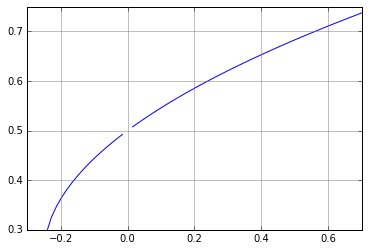

In [12]:
# ορίζουμε τη συνάρτηση
def func(x):
    return x/(numpy.sqrt(1+4*x)-1)
# ορίζουμε να μη διαμαρτύρεται το numpy στην περίπτωση διαίρεσης με το μηδέν
numpy.seterr(divide='ignore', invalid='ignore')
xvalues = numpy.linspace(start=-0.5,stop=1,num=100)
series = func(xvalues)
plt.figure()
plt.plot(xvalues, series)
plt.grid(b=True, which='major', color='gray', linestyle='-') # ορίζουμε γκρί πλέγματα
plt.xlim(-0.3,0.7) # τα όρια του άξονα x
plt.ylim(0.3,0.75) # τα όρια του άξονα y


Από τη γραφική παράσταση, το όριο φαίνεται να προσεγγίζει την τιμή 0.5.
Στη συνέχεια προσεγγίζουμε το μηδέν από τα αριστερά:

In [13]:
xminusvalues=[-0.25, -0.0312, -0.0078, -0.0019, -0.000119, -0.0000297, -0.00000742]
xminusvalues


In [14]:
 yvalues = [ func(x) for x in xminusvalues ]
yvalues


Παρατηρούμε ότι όσο πλησιάζουμε το μηδέν, τόσο η τιμή της συνάρτησης τείνει στο 0.5.

Το ίδιο προκύπτει εάν προσεγγίσουμε το μηδέν από τα δεξιά:

In [15]:
 xplusvalues=[0.5, 0.25, 0.0625, 0.039, 0.0015, 0.000225, 0.000040]
xplusvalues


In [16]:
yvalues = [ func(x) for x in xplusvalues ]
yvalues


Υπολογίζουμε το όριο με τη βοήθεια της συνάρτησης `limit`:

In [17]:
limit(x/(sqrt(1+4*x)-1),x,0)

Επομένως υπάρχει το όριο της συνάρτησης στο $x=0$ και έχει την τιμή 0.5. Είναι η συνάρτηση συνεχής στο σημείο αυτό;

Για να επιλύσουμε το όριο θεωρητικά, χρησιμοποιούμε την ταυτότητα $(a+b)(a-b)=a^2-b^2$. Ολοκληρώστε το στο σπίτι σας. 

**Εφαρμογή 2:** Μπορούμε να υπολογίσουμε την παράγωγο μιας συνάρτησης χρησιμοποιώντας το όριο που προκύπτει από τον ορισμό της παραγώγου. Η παράγωγος (derivative) μιας συνάρτησης $y=f(x)$ στο σημείο $P=(x_1,f(x_1))$ είναι η κλίση της εφαπτομένης σε αυτό το σημείο:

$f'(x_1)=\lim_{h\to0} \frac{f(x_1+h)-f(x_1)}{h}$

**Ορισμός** Μία συνάρτηση $f(x)$, που ορίζεται σε ένα ανοιχτό διάστημα στο οποίο ανήκει το σημείο $x=a$, είναι παραγωγίσιμη σε αυτό το σημείο, αν το όριο $lim_{Δx\to0} \frac{f(α+Δx)-f(a)}{Δx}$ υπάρχει και είναι πεπερασμένο. Δηλαδή ισχύει:

$lim_{Δx\to0^-} \frac{f(α+Δx)-f(a)}{Δx}=lim_{Δx\to0^+} \frac{f(α+Δx)-f(a)}{Δx}$. Η τιμή της έκφρασης αυτής είναι η τιμή της συνάρτησης της παραγώγου f'(x) στο σημείο $x=a$

Θεωρούμε την παρακάτω συνάρτηση:
    
$f(x)=(x+π)^2$

Υπολογίστε την παράγωγο της συνάρτησης χρησιμοποιώντας τον ορισμό της παραγώγου. Μπορείτε να χρησιμοποιήστε τη συνάρτηση `subs`, ώστε να αντικαταστήσετε το $x$ με το $x+h$. 

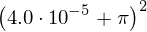

In [18]:
f = (x + pi)**2
f


In [19]:
print limit((((x+h+pi)**2-(x+pi)**2)/h),h,0,'+')
print limit((((x+h+pi)**2-(x+pi)**2)/h),h,0,'-')

TypeError: mpq() requires numeric or string argument

**Εφαρμογή 3:** Υπολογίστε την παράγωγο της συνάρτησης $f(x)=x^4$ χρησιμοποιώντας τον ορισμό της παραγώγου.

In [ ]:
print limit((((x+h)**4-x**4)/h),h,0,'+')
print limit((((x+h)**4-x**4)/h),h,0,'-')

## Παράγωγοι
Η παραγώγιση με τη βοήθεια της `Python` γίνεται συνήθως με απλό τρόπο, χρησιμοποιώντας τη συνάρτηση `diff`. Η συνάρτηση δέχεται σαν πρώτη παράμετρο την έκφραση που θέλουμε να παραγωγίσουμε και σαν δεύτερη παράμετρο το σύμβολο ως προς το οποίο θα παραγωγίσουμε.

In [ ]:
f=2*x**2
f


In [ ]:
diff(f,x)

**Βασικοί Κανόνες Παραγώγισης**

* **Κανόνας 1:**  Παράγωγος μιας σταθερής συνάρτησης. Αν $f(x)=c$,όπου $c$ είναι μια σταθερά, τότε $f'(x)=0$. Παράδειγμα $f(x)=5$.
* **Κανόνας 2:**  Παράγωγος μιας γραμμικής συνάρτησης. Αν  $f(x)=mx+c$,όπου $m$ και $c$ είναι σταθερές, τότε $f'(x)=m$. Παράδειγμα $f(x)=5x+7$.
* **Κανόνας 3:**  Παράγωγος μιας δυναμοσυνάρτησης. Αν $f(x)=x^n$, τότε $f'(x)=nx^{n-1}$. Παράδειγμα $f(x)=x^5$.
* **Κανόνας 4:**  Παράγωγος γινομένου σταθεράς επί συνάρτηση. Αν $g(x)=cf(x)$, όπου $c$ μία σταθερά, τότε $g'(x)=cf'(x)$. Παράδειγμα $g(x)=5x^2+5x$.
* **Κανόνας 5:**  Παράγωγος του αθροίσματος ή της διαφοράς δύο συναρτήσεων. Αν το $h(x)=f(x)+g(x)$, τότε $h'(x)=f'(x)+g'(x)$. Παράδειγμα$h(x)=sin(x)+con(x)$. Αν το $h(x)=f(x)-g(x)$, τότε $h'(x)=f'(x)-g'(x)$. Παράδειγμα $h(x)=sin(x)-x^2$.
* **Κανόνας 6:**  Παράγωγος αθροίσματος ενός οποιουδήποτε πεπερασμένου πλήθους συναρτήσεων. Αν $h(x)=\sum_{n=1}^{n}g_i(x)$ τότε $h'(x)=\sum_{n=1}^{n}g_i'(x)$. Παράδειγμα $h(x)=\sum_{n=1}^{n}(2x+3)$
* **Κανόνας 7:**  Παράγωγος του γινομένου δύο συναρτήσεων. Αν  $h(x)=f(x)g(x)$, τότε $h'(x)=f'(x)g(x)+f(x)g'(x)$. Παράδειγμα $f(x)=xsin(x)$.
* **Κανόνας 8:**  Παράγωγος πηλίκου δύο συναρτήσεων. Αν  $h(x)=\frac{f(x)}{g(x)}$, τότε $h'(x)=\frac{f'(x)g(x)+f(x)g'(x)}{g(x)^2}$. Παράδειγμα $h(x)=\frac{5x+2}{x^2+x}$.
* **Κανόνας 9:**  Παράγωγος σύνθετης συνάρτησης. Αν $y=f(u)$ και $u=g(x)$, δηλαδή $y=f(g(x))=h(x)$, τότε $h'(x)=f'(u)g'(x)$. Παράδειγμα $h(x)=(x^3+x+5)^6$.
* **Κανόνας 10:**  Παράγωγος της αντίστροφης μίας συνάρτησης. Αν η $y=f(x)$ έχει ως αντίστροφη συνάρτηση την $x=g(y)$, δηλαδή αν $g(y)=\frac{1}{f(y)}$ και $f'(x)\neq0$, τότε $g'(y)=\frac{1}{f'(x)}$ όπου $y=f(x)$.
* **Κανόνας 11:**  Παράγωγος της εκθετικής συνάρτησης. Αν $f(x)=e^x$ τότε $f'(x)=e^x$. Παράδειγμα $f(x)=e^{2x}$.
* **Κανόνας 12:**  Παράγωγος της λογαριθμικής συνάρτησης. Αν $f(x)=lnx$, τοτε $f'(x)=\frac{1}{x}$. Παράδειγμα $f(x)=ln(x+1)$.

**Εφαρμογή** Επιβεβαιώστε τους παραπάνω κανόνες με τη χρήση της python, χρησιμοποιώντας τα παραδείγματα.

In [ ]:
f=5
diff(f,x)

Μπορούμε να παραγωγίσουμε τη συνάρτηση $f(x)=xsin(x+y)$ ως προς το x.

**Επιπλέον εφαρμογες 4:** Υπολογίστε τις παρακάτω παραγώγους χρησιμοποιώντας τη συνάρτηση `diff`, όπου a, b σταθερές. Μπορείτε να επαληθεύσετε τα αποτελέσματα στο χαρτί.
* $y=(x-a)(x+b)$
* $y=a^4-12a^2x^3+7lnx$
* $y=\frac{4x}{7+x^2}$
* $y=cos2x-4sin^2x$


Μπορούμε να απλοποιήσουμε το τελευταίο αποτέλεσμα με τη βοήθεια της συνάρτησης `simplify`.

**Παράγωγοι ανώτερης τάξης: Κοίλες και κυρτές συναρτήσεις**

Έστω $f(x)$ μια συνάρτηση με πεδίο ορισμού $A$ και $Β$ το σύνολο των σημείων του $Α$ στα οποία αυτή είναι παραγωγίσιμη. Aντιστοιχίζουμε κάθε $x\in B$ στο $f'(x)$ ορίζουμε τη συνάρτηση η οποία ονομάζεται **πρώτη παράγωγος της f**. Αν υποθέσουμε ότι το $Β$ είναι διάστημα ή ένωση διαστημάτων, τότε η παράγωγος της $f'$,αν υπάρχει, λέγεται **δεύτερη παράγωγος της f** και συμβολίζεται με $f"$. Επαγωγικά ορίζεται η **νιοστή παράγωγος της f'**, με $ν\geqslant3$ και συμβολίζεται με $f^{v}$.

**Εφαρμογή** Να βρείτε τις πρώτες τέσσερις παραγώγους των συναρτήσεων : 
* $f(x)=x^4+3x^3-x+7$
* $f(x)=sin(x)$
* $f(x)=e^{x+3}$

**Ορισμός** 
* Μια διπλά παραγωγίσιμη συνάρτης $f(x)$ είναι **κυρτή** αν, σε όλα τα σημεία του πεδίου ορισμού της, ισχύει $f"(x)\geqslant0$
* Μια διπλά παραγωγίσιμη συνάρτη $f(x)$ είναι **αυστηρά κυρτή**, αν ισχύει $f"(x)\geqslant0$, με εξαίρεση ενδεχομένως σε ένα μόνο σημείο.
* Μια διπλά παραγωγίσιμη συνάρτη $f(x)$ είναι **κοίλη** αν, σε όλα τα σημεία του πεδίου ορισμού της, ισχύει $f"(x)\leqslant0$
* Μια διπλά παραγωγίσιμη συνάρτη $f(x)$ είναι **αυστηρά κοίλη**,αν ισχύει $f"(x)\leqslant0$, με εξαίρεση ενδεχομένως σε ένα μόνο σημείο.

**Παράδειγμα** Να προσδιορισθούν τα διαστήματα στα οποία η συνάρτηση $f(x)=x^4-6x^2+5$ είναι κυρτή ή κοίλη.

**Παράδειγμα** Μια βιομηχανία καθορίζει την τιμή πώλησης $f(x)$, σε ευρώ, κάθε μονάδας ενός προϊόντος, συναρτήσει του πλήθους $x$ των μονάδων παραγωγής, σύμφωνα με τον τύπο $f(x)=40000-6x$. Το κόστος παραγωγής μια μονάδας είναι $4000$ ευρώ. Αν η βιομηχανία πληρώνει φόρο $1200$ ευρώ για κάθε μονάδα προϊόντος, να βρεθεί πόσες μονάδες προϊόντος πρέπει να παράγει η βιομηχανία, ώστε να έχει το μέγιστο δυνατό κέρδος.

**Παράδειγμα** Το κόστος της ημερήσιας παραγωγής $x$ μονάδων ενός βιομηχανικού προϊοντος είναι $k(x)=\frac{1}{3}x^{3}-20x^2+600x+1000$ ευρώ, για $0\leqslant x\geqslant105$, ενώ η είσπραξη από την πώληση των $x$ μονάδων είναι $E(x)=420x-2x^2$. Να βρεθεί η ημερήσια παραγωγή του εργοστασίου, για την οποία το κέρδος γίνεται μέγιστο.

In [25]:
solve(1 + sin(x))/cos(x) + cos(x)/(1 + sin(x))==4 

TypeError: unsupported operand type(s) for /: 'list' and 'Float'

## Επιπρόσθετο διάβασμα για τα όρια και την παραγώγιση
* http://docs.sympy.org/latest/tutorial/calculus.html#limits - Επίλυση ορίων με τη βοήθεια του `SymPy`.
* http://docs.sympy.org/latest/tutorial/calculus.html#derivatives - Επίλυση παραγώγων με το `SymPy`.